## Algo de álgebra y el manejo de dos librerías para cálculo numérico y procesamiento de imágenes

In [1]:
import numpy as np  # linear algebra
import matplotlib as mpl # for plotting
from matplotlib import pyplot as plt # for plotting
import cv2 # for image processing

### Algo de álgebra

Cuando hacemos cálculos casi de cualquier tipo usamos vectores y matrices para guardar y procesar los datos de interés.

Un vector es una lista de número, por ejempo:

$$
v = [1, 2, 3, 4, 5, 6, 7, 8, 9]
$$

una matriz es una lista doble de números, 

$$
M = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
\end{bmatrix}
$$

Tanto los vectores como las matrices pueden ser sumadas entre si y multiplicadas por números:


$$
v5 = 5*v = 5*[1, 2, 3, 4, 5, 6, 7, 8, 9] = [5, 10, 15, 20, 25, 30, 35, 40, 45]
$$

veamos la suma:

$$
w = [9, 8, 7, 6, 5, 4, 3, 2, 1]
$$

$$
v + w = [1, 2, 3, 4, 5, 6, 7,8,9] + [9, 8, 7, 6, 5, 4, 3, 2, 1] =  [10, 10, 10, 10, 10, 10, 10, 10, 10]
$$

Vamos a usar ahora una librería que permite usar este tipo de vectores de forma eficiente para poder hacer cálculos numéricos, donde los vectores tienen varios millones de componentes. Por ejemplo en imágenes. 

Esta librería se llama `numpy`. Los vectores tienen todos sus elementos del mismo tipo, enteros o flotantes y un largo definido de antemano. 

In [5]:
v = np.arange(1, 10, 1)
v

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
v5 = 5*v
v5

array([ 5, 10, 15, 20, 25, 30, 35, 40, 45])

In [14]:
w = np.array([i for i in range(9, 0,-1)])
w

array([9, 8, 7, 6, 5, 4, 3, 2, 1])

In [17]:
v+w

array([10, 10, 10, 10, 10, 10, 10, 10, 10])

In [19]:
w22 = np.array([i**2 for i in range(9, 0,-1)])
w22

array([81, 64, 49, 36, 25, 16,  9,  4,  1])

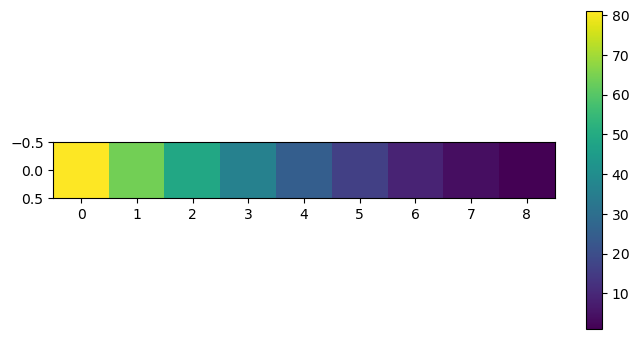

In [26]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
im = plt.imshow(w22.reshape(1,9)#, aspect="auto", interpolation="none"
                #, cmap="copper_r"
                , cmap="viridis")
plt.colorbar(im)
plt.show()

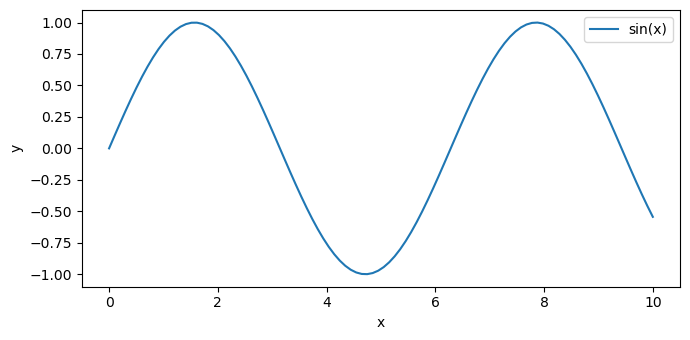

In [64]:
x = np.linspace(0, 10, 100)
y = np.sin(x)
plt.plot(x, y, label='sin(x)')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
# Show the plot
plt.show()

### Información sobre los objetos:

In [29]:
a = np.arange(15)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [32]:
a.shape

(15,)

In [31]:
M = a.reshape(3, 5)
M

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [33]:
M.shape

(3, 5)

In [34]:
a.ndim

1

In [35]:
M.ndim

2

In [36]:
a.dtype.name

'int64'

In [37]:
a.itemsize

8

In [38]:
a.size

15

In [39]:
type(a)

numpy.ndarray

In [42]:
b = np.array([1.2, 3.5, 5.1])

In [43]:
b.dtype

dtype('float64')

In [45]:
c = np.array([(1.5, 2, 3), (4, 5, 6)])
c

array([[1.5, 2. , 3. ],
       [4. , 5. , 6. ]])

In [47]:
c.dtype

dtype('float64')

In [48]:
c = np.array([[1, 2], [3, 4]], dtype=complex)
c

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

In [49]:
np.zeros((3, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [50]:
np.ones((2, 3, 4), dtype=np.int16)

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int16)

In [51]:
np.empty((3, 3))

array([[ 15.8934375 ,   0.        , 586.02083333],
       [  0.        ,   3.97335937,   6.02664063],
       [  0.        ,   0.        ,   1.        ]])

In [31]:
np.arange(24).reshape(2, 3, 4)

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

### Más sobre operaciones en vectores y otros arreglos.

In [54]:
a = np.array([20, 30, 40, 50])
b = np.arange(4)
b

array([0, 1, 2, 3])

In [55]:
c = b - a
c

array([-20, -29, -38, -47])

In [56]:
10*c

array([-200, -290, -380, -470])

In [57]:
b**2

array([0, 1, 4, 9])

In [58]:
10 * np.sin(a)

array([ 9.12945251, -9.88031624,  7.4511316 , -2.62374854])

## Matrices

In [100]:
shape = (50,50)
MM = np.empty(shape)

for i in range(shape[0]):
    for j in range(shape[1]):
        MM[i, j] = np.sin(2*np.pi*(i + j)/50)



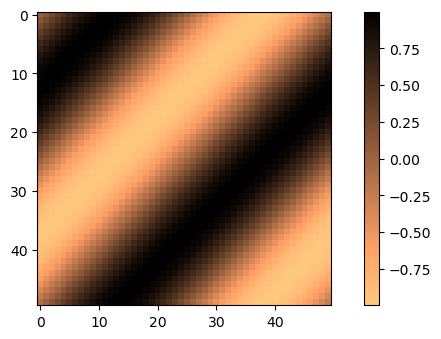

In [98]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
im = plt.imshow(MM #, aspect="auto", interpolation="none"
                , cmap="copper_r"
                #, cmap="viridis"
                )
plt.colorbar(im)
plt.show()

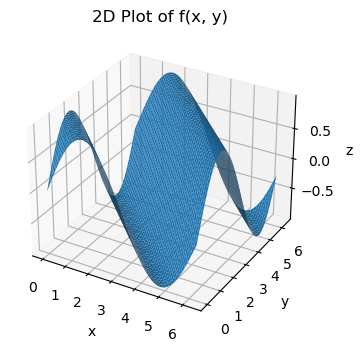

In [99]:
x = np.linspace(0, 2*np.pi, 50)
y = np.linspace(0, 2*np.pi, 50)
X, Y = np.meshgrid(x, y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, MM)

# Add axis labels and a title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('2D Plot of f(x, y)')

# Show the plot
plt.show()

## Operaciones con matrices

In [103]:
A = np.array([[1, 1],
              [0, 1]])
B = np.array([[2, 0],
              [3, 4]])
v = np.array([1, 2]) # v is a 1d array

In [106]:
A @ v

array([3, 2])

In [62]:
A @ B # matrix product (1*2 + 1*3, 1*0 + 1*4 etc.)

array([[5, 4],
       [3, 4]])

In [63]:
A.dot(B) # another matrix product

array([[5, 4],
       [3, 4]])

In [107]:
A.dot(v)

array([3, 2])

In [60]:
A*B # elementwise product

array([[2, 0],
       [0, 4]])

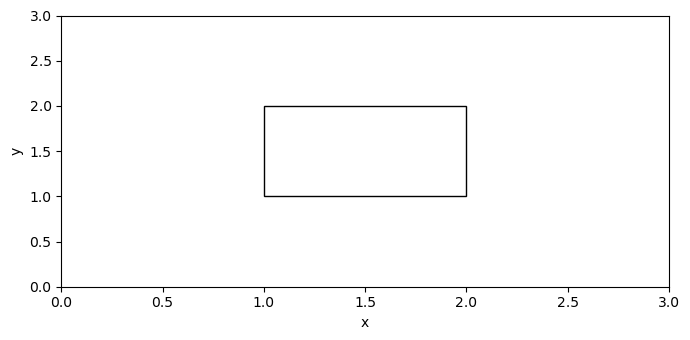

In [108]:
from matplotlib.patches import Polygon

# Define the vertices of the square
vertices = [(1, 1), (1, 2), (2, 2), (2, 1)]

# Create the plot and add the square
fig, ax = plt.subplots()
square = Polygon(vertices, closed=True, fill=None)
ax.add_patch(square)

# Set the axis limits and labels
ax.set_xlim([0, 3])
ax.set_ylim([0, 3])
ax.set_xlabel('x')
ax.set_ylabel('y')

# Show the plot
plt.show()

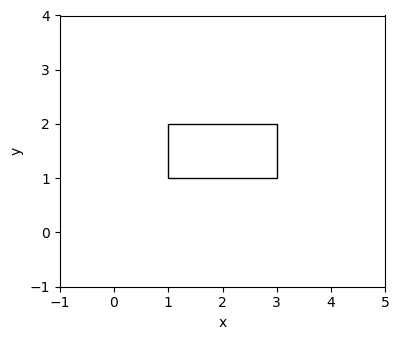

In [140]:
def four_point_figure_plot(x1, x2, x3, x4):
    # Create the plot and add the square
    fig, ax = plt.subplots()
    figure = Polygon([x1, x2, x3, x4], closed=True, fill=None)
    ax.add_patch(figure)

    # Set the axis limits and labels
    x_min = min(x1[0], x2[0], x3[0], x4[0]) -2
    x_max = max(x1[0], x2[0], x3[0], x4[0]) +2
    y_min = min(x1[1], x2[1], x3[1], x4[1]) -2
    y_max = max(x1[1], x2[1], x3[1], x4[1]) +2
    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_min, y_max]) 
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_aspect('equal', 'box')

    # Show the plot
    return fig


x1 = np.array([1, 1])
x2  = np.array([1, 2])
x3 = np.array([3, 2])
x4 = np.array([3, 1])

fig = four_point_figure_plot(x1, x2, x3, x4)
plt.show(fig)

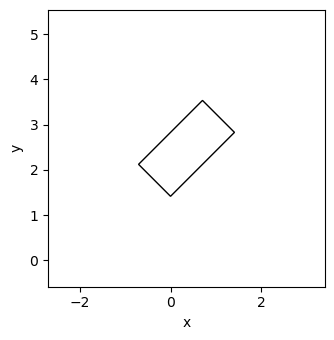

In [141]:
def R(theta):
    return np.array([[np.cos(theta), -np.sin(theta)],
                     [np.sin(theta), np.cos(theta)]])


theta = np.pi/4
fig = four_point_figure_plot(R(theta) @ x1, R(theta) @ x2, R(theta) @ x3, R(theta) @ x4)
plt.show(fig)

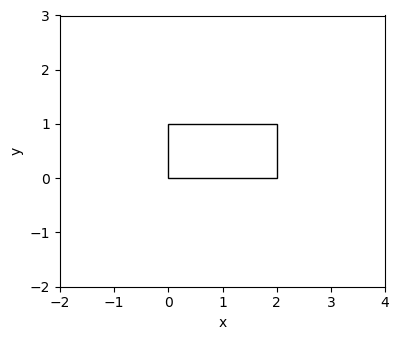

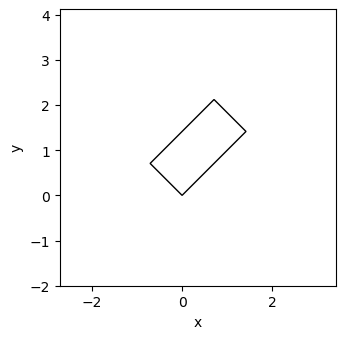

In [146]:
fig = four_point_figure_plot(x1-x1, x2-x1, x3-x1, x4-x1)
theta = np.pi/4
fig_R = four_point_figure_plot(R(theta) @ (x1-x1), R(theta) @ (x2-x1), R(theta) @ (x3-x1), R(theta) @ (x4-x1))
plt.show(fig)
plt.show(fig_R)

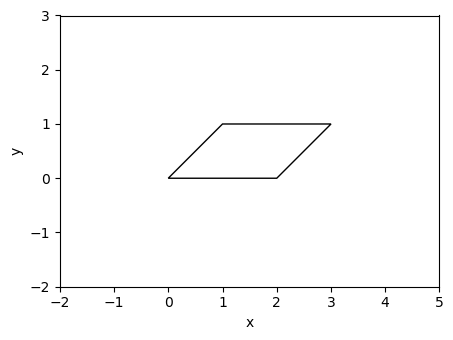

In [149]:
A = np.array([[1, 1],
              [0, 1]])

fig_A = four_point_figure_plot(A @ (x1-x1), A @ (x2-x1), A @ (x3-x1), A @ (x4-x1))
plt.show(fig_A)

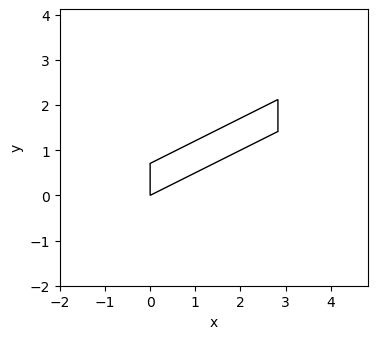

In [150]:
fig_AR = four_point_figure_plot(A @ R(theta) @ (x1-x1), A @ R(theta) @ (x2-x1), A @ R(theta) @ (x3-x1), A @ R(theta) @ (x4-x1))

### Ejercicio: 

Grafique la trasnformación RA y compare.

## Imágenes!

Veamos algunas formas de combinar matrices:

In [154]:

A = np.array([[1, 2],[3, 4]])
B = np.array([[5, 6],[7, 8]])

1. Combinaciones lineales:

In [155]:
0.5*A + 0.5*B

array([[3., 4.],
       [5., 6.]])

2. Poner una a la par de otra:

In [156]:
np.concatenate((A, B), axis=1)

array([[1, 2, 5, 6],
       [3, 4, 7, 8]])

3. Poner una sobre otra:

In [157]:
np.concatenate((A, B), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

4. Trasponer: 

In [160]:
np.transpose(np.concatenate((A, B), axis=0))

array([[1, 3, 5, 7],
       [2, 4, 6, 8]])

### Imágenes son matrices!